In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap

In [4]:
pd.set_option('display.max_colwidth', None)

df = pd.read_csv("data/result.csv")
df.head(20)

,name,Score,Impact Category,unit
0,India,0.127566,"('ReCiPe 2016 v1.03, midpoint (E) no LT', 'acidification: terrestrial no LT', 'terrestrial acidification potential (TAP) no LT')",kg SO2-Eq
1,India,36.491312,"('ReCiPe 2016 v1.03, midpoint (E) no LT', 'climate change no LT', 'global warming potential (GWP1000) no LT')",kg CO2-Eq
2,India,0.159025,"('ReCiPe 2016 v1.03, midpoint (E) no LT', 'ecotoxicity: freshwater no LT', 'freshwater ecotoxicity potential (FETP) no LT')","kg 1,4-DCB-Eq"
3,India,970.737711,"('ReCiPe 2016 v1.03, midpoint (E) no LT', 'ecotoxicity: marine no LT', 'marine ecotoxicity potential (METP) no LT')","kg 1,4-DCB-Eq"
4,India,139.131102,"('ReCiPe 2016 v1.03, midpoint (E) no LT', 'ecotoxicity: terrestrial no LT', 'terrestrial ecotoxicity potential (TETP) no LT')","kg 1,4-DCB-Eq"
5,India,9.875449,"('ReCiPe 2016 v1.03, midpoint (E) no LT', 'energy resources: non-renewable, fossil no LT', 'fossil fuel potential (FFP) no LT')",kg oil-Eq
6,India,0.007222,"('ReCiPe 2016 v1.03, midpoint (E) no LT', 'eutrophication: freshwater no LT', 'freshwater eutrophication potential (FEP) no LT')",kg P-Eq
7,India,0.005107,"('ReCiPe 2016 v1.03, midpoint (E) no LT', 'eutrophication: marine no LT', 'marine eutrophication potential (MEP) no LT')",kg N-Eq
8,India,26.535516,"('ReCiPe 2016 v1.03, midpoint (E) no LT', 'human toxicity: carcinogenic no LT', 'human toxicity potential (HTPc) no LT')","kg 1,4-DCB-Eq"
9,India,1321.906324,"('ReCiPe 2016 v1.03, midpoint (E) no LT', 'human toxicity: non-carcinogenic no LT', 'human toxicity potential (HTPnc) no LT')","kg 1,4-DCB-Eq"


In [5]:
df['name'].value_counts()

name
India     18
Brazil    18
Europe    18
USA       18
China     18
Name: count, dtype: int64

In [6]:
df['Impact Category'].value_counts()

Impact Category
('ReCiPe 2016 v1.03, midpoint (E) no LT', 'acidification: terrestrial no LT', 'terrestrial acidification potential (TAP) no LT')                                                    5
('ReCiPe 2016 v1.03, midpoint (E) no LT', 'climate change no LT', 'global warming potential (GWP1000) no LT')                                                                       5
('ReCiPe 2016 v1.03, midpoint (E) no LT', 'photochemical oxidant formation: terrestrial ecosystems no LT', 'photochemical oxidant formation potential: ecosystems (EOFP) no LT')    5
('ReCiPe 2016 v1.03, midpoint (E) no LT', 'photochemical oxidant formation: human health no LT', 'photochemical oxidant formation potential: humans (HOFP) no LT')                  5
('ReCiPe 2016 v1.03, midpoint (E) no LT', 'particulate matter formation no LT', 'particulate matter formation potential (PMFP) no LT')                                              5
('ReCiPe 2016 v1.03, midpoint (E) no LT', 'ozone depletion no LT', 'ozone 

In [7]:
for index, row in df.iterrows():
    df['Impact Category'] = df['Impact Category'].str.replace("'", "")
    df['Impact Category'] = df['Impact Category'].str.replace("ReCiPe 2016 v1.03, midpoint (E) no LT, ", "")
    df['Impact Category'] = df['Impact Category'].str.replace(" no LT", "")
    df['Impact Category'] = df['Impact Category'].str.lstrip('(')
    df['Impact Category'] = df['Impact Category'].str.replace('))', ")")

df

,name,Score,Impact Category,unit
0,India,0.127566,"acidification: terrestrial, terrestrial acidification potential (TAP)",kg SO2-Eq
1,India,36.491312,"climate change, global warming potential (GWP1000)",kg CO2-Eq
2,India,0.159025,"ecotoxicity: freshwater, freshwater ecotoxicity potential (FETP)","kg 1,4-DCB-Eq"
3,India,970.737711,"ecotoxicity: marine, marine ecotoxicity potential (METP)","kg 1,4-DCB-Eq"
4,India,139.131102,"ecotoxicity: terrestrial, terrestrial ecotoxicity potential (TETP)","kg 1,4-DCB-Eq"
...,...,...,...,...
85,China,0.000025,"ozone depletion, ozone depletion potential (ODPinfinite)",kg CFC-11-Eq
86,China,0.071784,"particulate matter formation, particulate matter formation potential (PMFP)",kg PM2.5-Eq
87,China,0.086541,"photochemical oxidant formation: human health, photochemical oxidant formation potential: humans (HOFP)",kg NOx-Eq
88,China,0.089941,"photochemical oxidant formation: terrestrial ecosystems, photochemical oxidant formation potential: ecosystems (EOFP)",kg NOx-Eq


In [8]:
df.to_csv('data/cleaned_data.csv', index=True)

In [90]:
df[df["name"] == 'India']

,name,Score,Impact Category,unit
0,India,0.127566,"acidification: terrestrial, terrestrial acidification potential (TAP)",kg SO2-Eq
1,India,36.491312,"climate change, global warming potential (GWP1000)",kg CO2-Eq
2,India,0.159025,"ecotoxicity: freshwater, freshwater ecotoxicity potential (FETP)","kg 1,4-DCB-Eq"
3,India,970.737711,"ecotoxicity: marine, marine ecotoxicity potential (METP)","kg 1,4-DCB-Eq"
4,India,139.131102,"ecotoxicity: terrestrial, terrestrial ecotoxicity potential (TETP)","kg 1,4-DCB-Eq"
5,India,9.875449,"energy resources: non-renewable, fossil, fossil fuel potential (FFP)",kg oil-Eq
6,India,0.007222,"eutrophication: freshwater, freshwater eutrophication potential (FEP)",kg P-Eq
7,India,0.005107,"eutrophication: marine, marine eutrophication potential (MEP)",kg N-Eq
8,India,26.535516,"human toxicity: carcinogenic, human toxicity potential (HTPc)","kg 1,4-DCB-Eq"
9,India,1321.906324,"human toxicity: non-carcinogenic, human toxicity potential (HTPnc)","kg 1,4-DCB-Eq"


In [92]:
gwp = df[df["Impact Category"] == 'climate change, global warming potential (GWP1000)']
gwp

,name,Score,Impact Category,unit
1,India,36.491312,"climate change, global warming potential (GWP1000)",kg CO2-Eq
19,Brazil,36.053474,"climate change, global warming potential (GWP1000)",kg CO2-Eq
37,Europe,36.098721,"climate change, global warming potential (GWP1000)",kg CO2-Eq
55,USA,36.137579,"climate change, global warming potential (GWP1000)",kg CO2-Eq
73,China,36.296453,"climate change, global warming potential (GWP1000)",kg CO2-Eq


In [103]:
tap = df[df["Impact Category"] == 'acidification: terrestrial, terrestrial acidification potential (TAP)']
tap

,name,Score,Impact Category,unit
0,India,0.127566,"acidification: terrestrial, terrestrial acidification potential (TAP)",kg SO2-Eq
18,Brazil,0.126052,"acidification: terrestrial, terrestrial acidification potential (TAP)",kg SO2-Eq
36,Europe,0.126332,"acidification: terrestrial, terrestrial acidification potential (TAP)",kg SO2-Eq
54,USA,0.126198,"acidification: terrestrial, terrestrial acidification potential (TAP)",kg SO2-Eq
72,China,0.127242,"acidification: terrestrial, terrestrial acidification potential (TAP)",kg SO2-Eq


In [104]:
eofp = df[df["Impact Category"] == 'photochemical oxidant formation: terrestrial ecosystems, photochemical oxidant formation potential: ecosystems (EOFP)']
eofp

,name,Score,Impact Category,unit
16,India,0.090023,"photochemical oxidant formation: terrestrial ecosystems, photochemical oxidant formation potential: ecosystems (EOFP)",kg NOx-Eq
34,Brazil,0.088921,"photochemical oxidant formation: terrestrial ecosystems, photochemical oxidant formation potential: ecosystems (EOFP)",kg NOx-Eq
52,Europe,0.089053,"photochemical oxidant formation: terrestrial ecosystems, photochemical oxidant formation potential: ecosystems (EOFP)",kg NOx-Eq
70,USA,0.089039,"photochemical oxidant formation: terrestrial ecosystems, photochemical oxidant formation potential: ecosystems (EOFP)",kg NOx-Eq
88,China,0.089941,"photochemical oxidant formation: terrestrial ecosystems, photochemical oxidant formation potential: ecosystems (EOFP)",kg NOx-Eq


In [105]:
hofp = df[df["Impact Category"] == 'photochemical oxidant formation: human health, photochemical oxidant formation potential: humans (HOFP)']
hofp

,name,Score,Impact Category,unit
15,India,0.086616,"photochemical oxidant formation: human health, photochemical oxidant formation potential: humans (HOFP)",kg NOx-Eq
33,Brazil,0.085520,"photochemical oxidant formation: human health, photochemical oxidant formation potential: humans (HOFP)",kg NOx-Eq
51,Europe,0.085648,"photochemical oxidant formation: human health, photochemical oxidant formation potential: humans (HOFP)",kg NOx-Eq
69,USA,0.085627,"photochemical oxidant formation: human health, photochemical oxidant formation potential: humans (HOFP)",kg NOx-Eq
87,China,0.086541,"photochemical oxidant formation: human health, photochemical oxidant formation potential: humans (HOFP)",kg NOx-Eq


In [106]:
pmfp = df[df["Impact Category"] == 'particulate matter formation, particulate matter formation potential (PMFP)']
pmfp

,name,Score,Impact Category,unit
14,India,0.072543,"particulate matter formation, particulate matter formation potential (PMFP)",kg PM2.5-Eq
32,Brazil,0.071265,"particulate matter formation, particulate matter formation potential (PMFP)",kg PM2.5-Eq
50,Europe,0.071352,"particulate matter formation, particulate matter formation potential (PMFP)",kg PM2.5-Eq
68,USA,0.071555,"particulate matter formation, particulate matter formation potential (PMFP)",kg PM2.5-Eq
86,China,0.071784,"particulate matter formation, particulate matter formation potential (PMFP)",kg PM2.5-Eq


In [107]:
odpinfinite = df[df["Impact Category"] == 'ozone depletion, ozone depletion potential (ODPinfinite)']
odpinfinite

,name,Score,Impact Category,unit
13,India,0.000025,"ozone depletion, ozone depletion potential (ODPinfinite)",kg CFC-11-Eq
31,Brazil,0.000025,"ozone depletion, ozone depletion potential (ODPinfinite)",kg CFC-11-Eq
49,Europe,0.000025,"ozone depletion, ozone depletion potential (ODPinfinite)",kg CFC-11-Eq
67,USA,0.000025,"ozone depletion, ozone depletion potential (ODPinfinite)",kg CFC-11-Eq
85,China,0.000025,"ozone depletion, ozone depletion potential (ODPinfinite)",kg CFC-11-Eq


In [108]:
sop = df[df["Impact Category"] == 'material resources: metals/minerals, surplus ore potential (SOP)']
sop

,name,Score,Impact Category,unit
12,India,0.815714,"material resources: metals/minerals, surplus ore potential (SOP)",kg Cu-Eq
30,Brazil,0.816162,"material resources: metals/minerals, surplus ore potential (SOP)",kg Cu-Eq
48,Europe,0.815661,"material resources: metals/minerals, surplus ore potential (SOP)",kg Cu-Eq
66,USA,0.815657,"material resources: metals/minerals, surplus ore potential (SOP)",kg Cu-Eq
84,China,0.815675,"material resources: metals/minerals, surplus ore potential (SOP)",kg Cu-Eq


In [109]:
lop = df[df["Impact Category"] == 'land use, agricultural land occupation (LOP)']
lop

,name,Score,Impact Category,unit
11,India,0.599336,"land use, agricultural land occupation (LOP)",m2*a crop-Eq
29,Brazil,0.597385,"land use, agricultural land occupation (LOP)",m2*a crop-Eq
47,Europe,0.596128,"land use, agricultural land occupation (LOP)",m2*a crop-Eq
65,USA,0.595825,"land use, agricultural land occupation (LOP)",m2*a crop-Eq
83,China,0.596483,"land use, agricultural land occupation (LOP)",m2*a crop-Eq


In [110]:
irp = df[df["Impact Category"] == 'ionising radiation, ionising radiation potential (IRP)']
irp

,name,Score,Impact Category,unit
10,India,2.276424,"ionising radiation, ionising radiation potential (IRP)",kg Co-60-Eq
28,Brazil,2.265039,"ionising radiation, ionising radiation potential (IRP)",kg Co-60-Eq
46,Europe,2.303812,"ionising radiation, ionising radiation potential (IRP)",kg Co-60-Eq
64,USA,2.304615,"ionising radiation, ionising radiation potential (IRP)",kg Co-60-Eq
82,China,2.269660,"ionising radiation, ionising radiation potential (IRP)",kg Co-60-Eq


In [111]:
htpnc = df[df["Impact Category"] == 'human toxicity: non-carcinogenic, human toxicity potential (HTPnc)']
htpnc

,name,Score,Impact Category,unit
9,India,1321.906324,"human toxicity: non-carcinogenic, human toxicity potential (HTPnc)","kg 1,4-DCB-Eq"
27,Brazil,1314.340478,"human toxicity: non-carcinogenic, human toxicity potential (HTPnc)","kg 1,4-DCB-Eq"
45,Europe,1315.118302,"human toxicity: non-carcinogenic, human toxicity potential (HTPnc)","kg 1,4-DCB-Eq"
63,USA,1314.672946,"human toxicity: non-carcinogenic, human toxicity potential (HTPnc)","kg 1,4-DCB-Eq"
81,China,1317.414707,"human toxicity: non-carcinogenic, human toxicity potential (HTPnc)","kg 1,4-DCB-Eq"


In [112]:
htpc = df[df["Impact Category"] == 'human toxicity: carcinogenic, human toxicity potential (HTPc)']
htpc

,name,Score,Impact Category,unit
8,India,26.535516,"human toxicity: carcinogenic, human toxicity potential (HTPc)","kg 1,4-DCB-Eq"
26,Brazil,26.327315,"human toxicity: carcinogenic, human toxicity potential (HTPc)","kg 1,4-DCB-Eq"
44,Europe,26.369071,"human toxicity: carcinogenic, human toxicity potential (HTPc)","kg 1,4-DCB-Eq"
62,USA,26.363647,"human toxicity: carcinogenic, human toxicity potential (HTPc)","kg 1,4-DCB-Eq"
80,China,26.446262,"human toxicity: carcinogenic, human toxicity potential (HTPc)","kg 1,4-DCB-Eq"


In [113]:
mep = df[df["Impact Category"] == 'eutrophication: marine, marine eutrophication potential (MEP)']
mep

,name,Score,Impact Category,unit
7,India,0.005107,"eutrophication: marine, marine eutrophication potential (MEP)",kg N-Eq
25,Brazil,0.005110,"eutrophication: marine, marine eutrophication potential (MEP)",kg N-Eq
43,Europe,0.005107,"eutrophication: marine, marine eutrophication potential (MEP)",kg N-Eq
61,USA,0.005107,"eutrophication: marine, marine eutrophication potential (MEP)",kg N-Eq
79,China,0.005107,"eutrophication: marine, marine eutrophication potential (MEP)",kg N-Eq


In [114]:
fep = df[df["Impact Category"] == 'eutrophication: freshwater, freshwater eutrophication potential (FEP)']
fep

,name,Score,Impact Category,unit
6,India,0.007222,"eutrophication: freshwater, freshwater eutrophication potential (FEP)",kg P-Eq
24,Brazil,0.007166,"eutrophication: freshwater, freshwater eutrophication potential (FEP)",kg P-Eq
42,Europe,0.007180,"eutrophication: freshwater, freshwater eutrophication potential (FEP)",kg P-Eq
60,USA,0.007179,"eutrophication: freshwater, freshwater eutrophication potential (FEP)",kg P-Eq
78,China,0.007173,"eutrophication: freshwater, freshwater eutrophication potential (FEP)",kg P-Eq


In [115]:
ffp = df[df["Impact Category"] == 'energy resources: non-renewable, fossil, fossil fuel potential (FFP)']
ffp

,name,Score,Impact Category,unit
5,India,9.875449,"energy resources: non-renewable, fossil, fossil fuel potential (FFP)",kg oil-Eq
23,Brazil,9.745353,"energy resources: non-renewable, fossil, fossil fuel potential (FFP)",kg oil-Eq
41,Europe,9.773576,"energy resources: non-renewable, fossil, fossil fuel potential (FFP)",kg oil-Eq
59,USA,9.791278,"energy resources: non-renewable, fossil, fossil fuel potential (FFP)",kg oil-Eq
77,China,9.817250,"energy resources: non-renewable, fossil, fossil fuel potential (FFP)",kg oil-Eq


In [116]:
tetp = df[df["Impact Category"] == 'ecotoxicity: terrestrial, terrestrial ecotoxicity potential (TETP)']
tetp

,name,Score,Impact Category,unit
4,India,139.131102,"ecotoxicity: terrestrial, terrestrial ecotoxicity potential (TETP)","kg 1,4-DCB-Eq"
22,Brazil,138.841966,"ecotoxicity: terrestrial, terrestrial ecotoxicity potential (TETP)","kg 1,4-DCB-Eq"
40,Europe,138.857716,"ecotoxicity: terrestrial, terrestrial ecotoxicity potential (TETP)","kg 1,4-DCB-Eq"
58,USA,138.812424,"ecotoxicity: terrestrial, terrestrial ecotoxicity potential (TETP)","kg 1,4-DCB-Eq"
76,China,138.966502,"ecotoxicity: terrestrial, terrestrial ecotoxicity potential (TETP)","kg 1,4-DCB-Eq"


In [117]:
metp = df[df["Impact Category"] == 'ecotoxicity: marine, marine ecotoxicity potential (METP)']
metp

,name,Score,Impact Category,unit
3,India,970.737711,"ecotoxicity: marine, marine ecotoxicity potential (METP)","kg 1,4-DCB-Eq"
21,Brazil,969.618284,"ecotoxicity: marine, marine ecotoxicity potential (METP)","kg 1,4-DCB-Eq"
39,Europe,969.486516,"ecotoxicity: marine, marine ecotoxicity potential (METP)","kg 1,4-DCB-Eq"
57,USA,969.379286,"ecotoxicity: marine, marine ecotoxicity potential (METP)","kg 1,4-DCB-Eq"
75,China,969.819724,"ecotoxicity: marine, marine ecotoxicity potential (METP)","kg 1,4-DCB-Eq"


In [118]:
fetp = df[df["Impact Category"] == 'ecotoxicity: freshwater, freshwater ecotoxicity potential (FETP)']
fetp

,name,Score,Impact Category,unit
2,India,0.159025,"ecotoxicity: freshwater, freshwater ecotoxicity potential (FETP)","kg 1,4-DCB-Eq"
20,Brazil,0.158803,"ecotoxicity: freshwater, freshwater ecotoxicity potential (FETP)","kg 1,4-DCB-Eq"
38,Europe,0.158823,"ecotoxicity: freshwater, freshwater ecotoxicity potential (FETP)","kg 1,4-DCB-Eq"
56,USA,0.158819,"ecotoxicity: freshwater, freshwater ecotoxicity potential (FETP)","kg 1,4-DCB-Eq"
74,China,0.158887,"ecotoxicity: freshwater, freshwater ecotoxicity potential (FETP)","kg 1,4-DCB-Eq"


In [119]:
wcp = df[df["Impact Category"] == 'water use, water consumption potential (WCP)']
wcp

,name,Score,Impact Category,unit
17,India,0.392708,"water use, water consumption potential (WCP)",cubic meter
35,Brazil,0.399343,"water use, water consumption potential (WCP)",cubic meter
53,Europe,0.392290,"water use, water consumption potential (WCP)",cubic meter
71,USA,0.391367,"water use, water consumption potential (WCP)",cubic meter
89,China,0.391421,"water use, water consumption potential (WCP)",cubic meter


In [93]:
gwp.to_excel('gwp.xlsx')

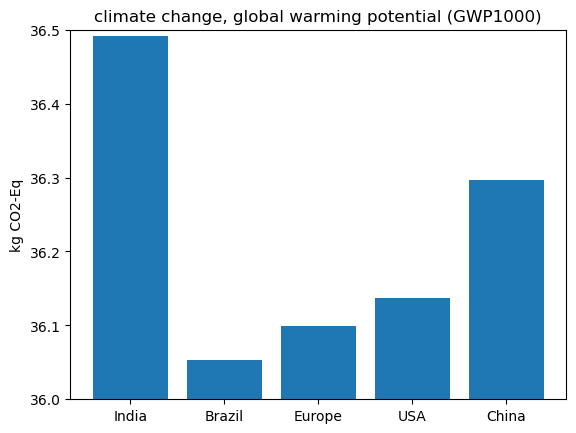

In [137]:
x, y = gwp['name'], gwp['Score']

plt.bar(x=x, height=y)
plt.title('climate change, global warming potential (GWP1000)')
plt.ylabel('kg CO2-Eq')
plt.ylim(36,36.5)
plt.savefig('gwp.jpg')

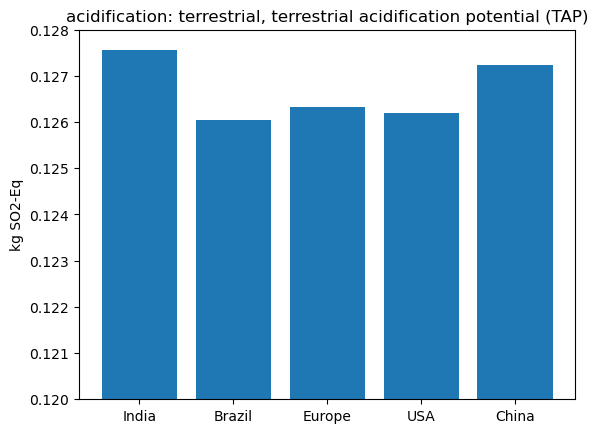

In [164]:
x, y = tap['name'], tap['Score']

plt.bar(x=x, height=y)
plt.title('acidification: terrestrial, terrestrial acidification potential (TAP)')
plt.ylabel('kg SO2-Eq')
plt.ylim(0.12,0.128)
plt.savefig('tap.jpg')

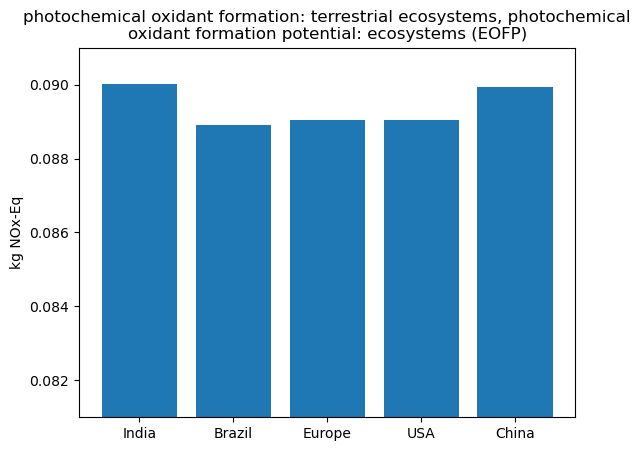

In [167]:
x, y = eofp['name'], eofp['Score']

plt.bar(x=x, height=y)
plt.title("\n".join(wrap('photochemical oxidant formation: terrestrial ecosystems, photochemical oxidant formation potential: ecosystems (EOFP)')))
plt.ylabel('kg NOx-Eq')
plt.ylim(0.081,0.091)
plt.savefig('eofp.jpg')

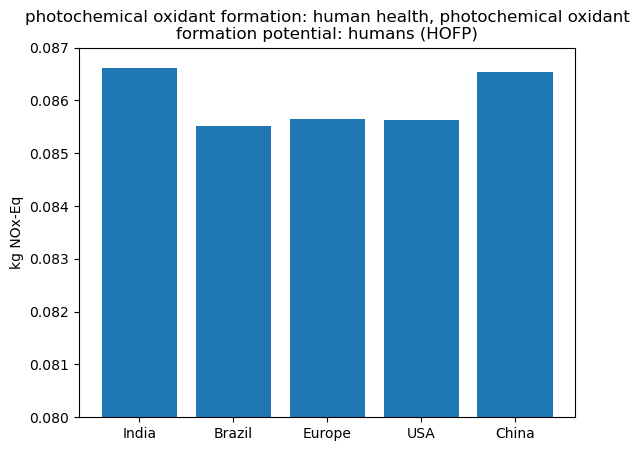

In [170]:
x, y = hofp['name'], hofp['Score']

plt.bar(x=x, height=y)
plt.title("\n".join(wrap('photochemical oxidant formation: human health, photochemical oxidant formation potential: humans (HOFP)')))
plt.ylabel('kg NOx-Eq')
plt.ylim(0.08,0.087)
plt.savefig('hofp.jpg')

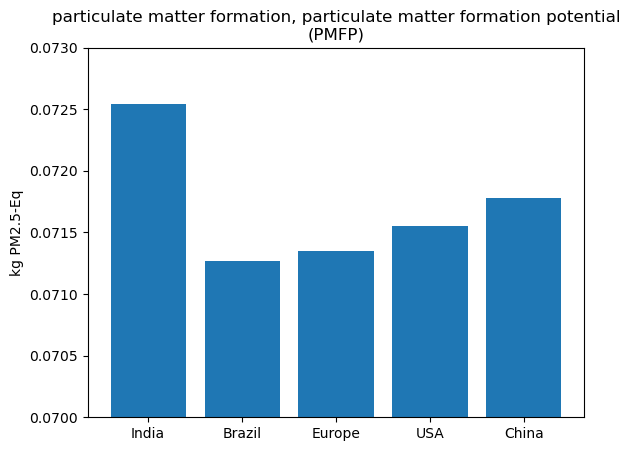

In [172]:
x, y = pmfp['name'], pmfp['Score']

plt.bar(x=x, height=y)
plt.title("\n".join(wrap('particulate matter formation, particulate matter formation potential (PMFP)')))
plt.ylabel('kg PM2.5-Eq')
plt.ylim(0.07,0.073)
plt.savefig('pmfp.jpg')

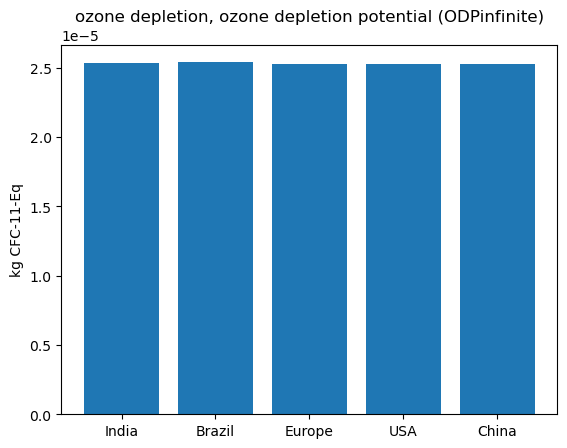

In [174]:
x, y = odpinfinite['name'], odpinfinite['Score']

plt.bar(x=x, height=y)
plt.title('ozone depletion, ozone depletion potential (ODPinfinite)')
plt.ylabel('kg CFC-11-Eq')
plt.savefig('odpinfinite.jpg')

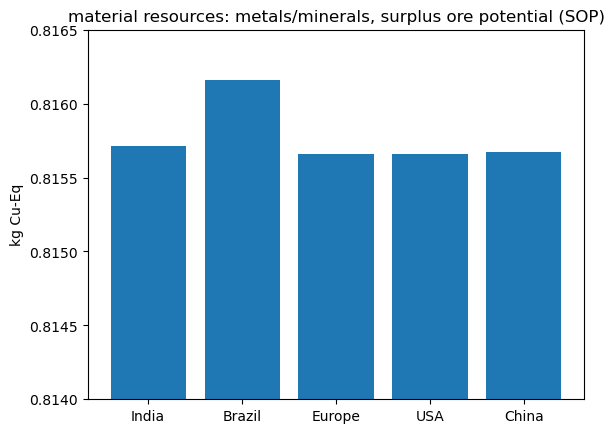

In [185]:
x, y = sop['name'], sop['Score']

plt.bar(x=x, height=y)
plt.title('material resources: metals/minerals, surplus ore potential (SOP)')
plt.ylabel('kg Cu-Eq')
plt.ylim(0.814,0.8165)
plt.savefig('sop.jpg')

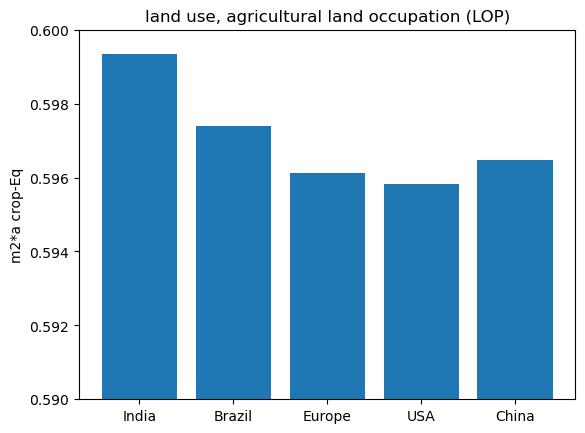

In [186]:
x, y = lop['name'], lop['Score']

plt.bar(x=x, height=y)
plt.title('land use, agricultural land occupation (LOP)')
plt.ylabel('m2*a crop-Eq')
plt.ylim(0.59,0.6)
plt.savefig('lop.jpg')

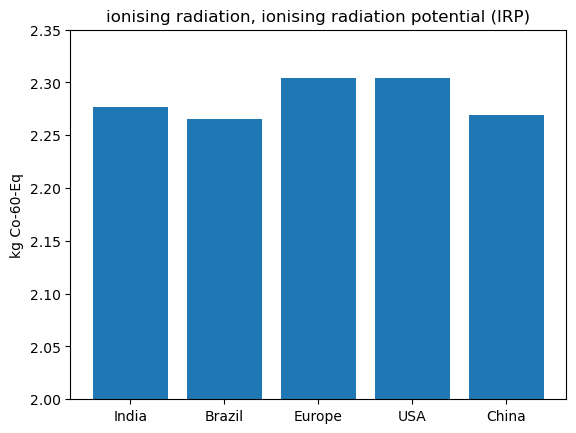

In [193]:
x, y = irp['name'], irp['Score']

plt.bar(x=x, height=y)
plt.title('ionising radiation, ionising radiation potential (IRP)')
plt.ylabel('kg Co-60-Eq')
plt.ylim(2.0,2.35)
plt.savefig('irp.jpg')

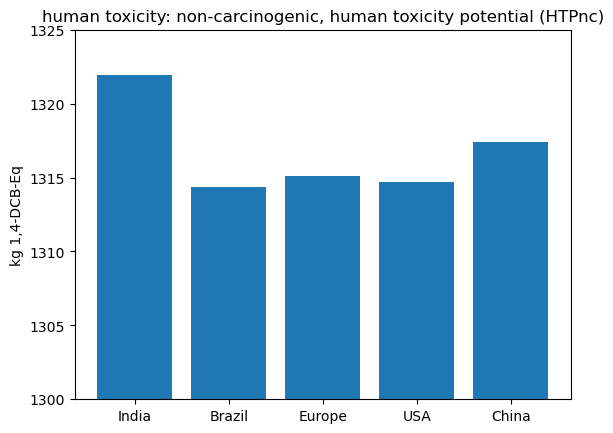

In [199]:
x, y = htpnc['name'], htpnc['Score']

plt.bar(x=x, height=y)
plt.title('human toxicity: non-carcinogenic, human toxicity potential (HTPnc)')
plt.ylabel('kg 1,4-DCB-Eq')
plt.ylim(1300,1325)
plt.savefig('htpnc.jpg')

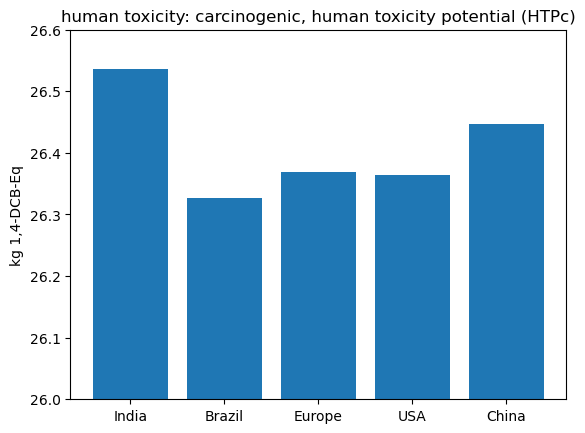

In [204]:
x, y = htpc['name'], htpc['Score']

plt.bar(x=x, height=y)
plt.title('human toxicity: carcinogenic, human toxicity potential (HTPc)')
plt.ylabel('kg 1,4-DCB-Eq')
plt.ylim(26,26.6)
plt.savefig('htpc.jpg')

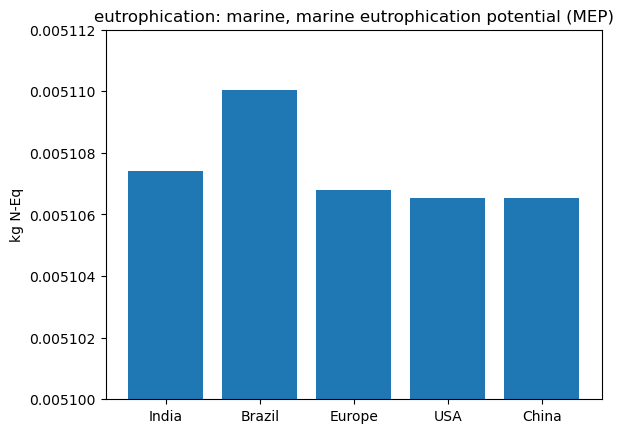

In [212]:
x, y = mep['name'], mep['Score']

plt.bar(x=x, height=y)
plt.title('eutrophication: marine, marine eutrophication potential (MEP)')
plt.ylabel('kg N-Eq')
plt.ylim(0.0051,0.005112)
plt.savefig('mep.jpg')

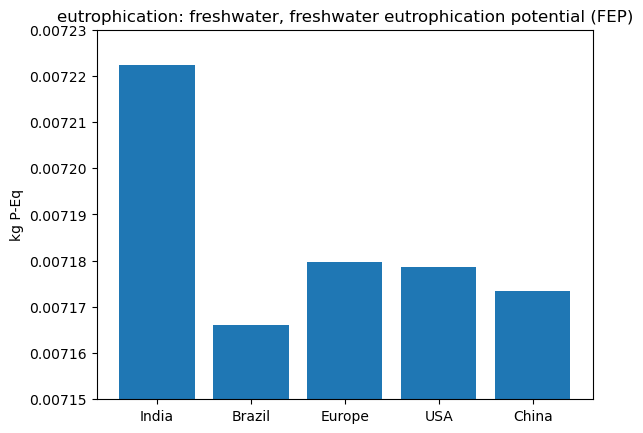

In [236]:
x, y = fep['name'], fep['Score']

plt.bar(x=x, height=y)
plt.title('eutrophication: freshwater, freshwater eutrophication potential (FEP)')
plt.ylabel('kg P-Eq')
plt.ylim(0.00715,0.00723)
plt.savefig('fep.jpg')

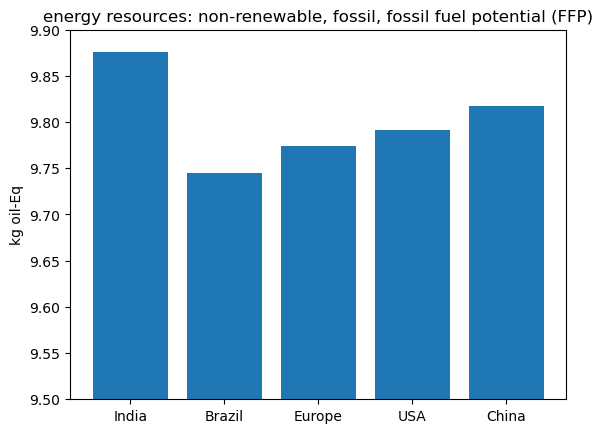

In [241]:
x, y = ffp['name'], ffp['Score']

plt.bar(x=x, height=y)
plt.title('energy resources: non-renewable, fossil, fossil fuel potential (FFP)')
plt.ylabel('kg oil-Eq')
plt.ylim(9.5,9.9)
plt.savefig('ffp.jpg')

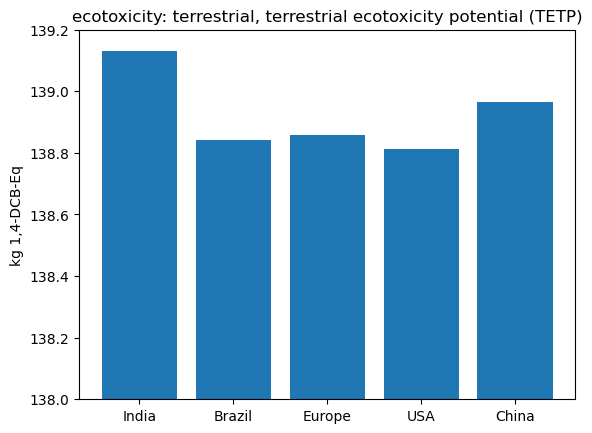

In [249]:
x, y = tetp['name'], tetp['Score']

plt.bar(x=x, height=y)
plt.title('ecotoxicity: terrestrial, terrestrial ecotoxicity potential (TETP)')
plt.ylabel('kg 1,4-DCB-Eq')
plt.ylim(138,139.2)
plt.savefig('tetp.jpg')

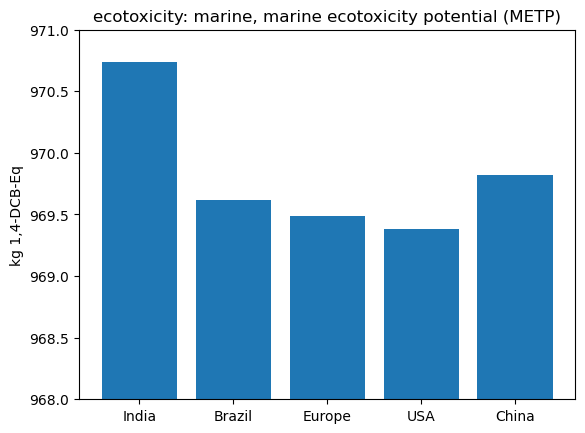

In [256]:
x, y = metp['name'], metp['Score']

plt.bar(x=x, height=y)
plt.title('ecotoxicity: marine, marine ecotoxicity potential (METP)')
plt.ylabel('kg 1,4-DCB-Eq')
plt.ylim(968,971)
plt.savefig('metp.jpg')

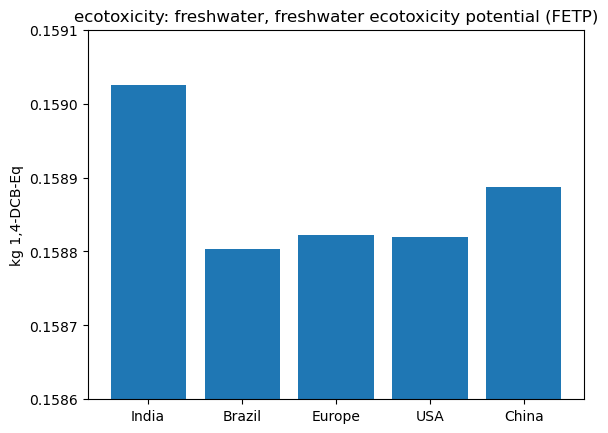

In [264]:
x, y = fetp['name'], fetp['Score']

plt.bar(x=x, height=y)
plt.title('ecotoxicity: freshwater, freshwater ecotoxicity potential (FETP)')
plt.ylabel('kg 1,4-DCB-Eq')
plt.ylim(0.1586,0.1591)
plt.savefig('fetp.jpg')

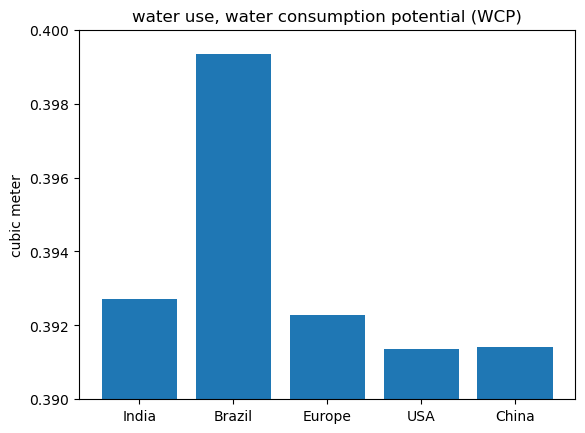

In [268]:
x, y = wcp['name'], wcp['Score']

plt.bar(x=x, height=y)
plt.title('water use, water consumption potential (WCP)')
plt.ylabel('cubic meter')
plt.ylim(0.39,0.4)
plt.savefig('wcp.jpg')